<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Datos Atípicos </font> </center>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

LI=load_iris()
df=pd.DataFrame(LI.data,columns=LI.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
q3,q1=np.quantile(df,(0.75,0.25),axis=0)
iqr=q3-q1
iqr

array([1.3, 0.5, 3.5, 1.5])

In [4]:
Li=q1-1.5*iqr
Ls=q3+1.5*iqr
Li

array([ 3.15,  2.05, -3.65, -1.95])

In [5]:
Ls

array([ 8.35,  4.05, 10.35,  4.05])

In [ ]:
dfcopy=df.copy()
dfcopy.loc[:]=(df<Li)|(df>Ls)
dfcopy

In [10]:
df[dfcopy['sepal length (cm)']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [12]:
for c in dfcopy:
  print(df[dfcopy[c]])

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
Li

array([ 3.15,  2.05, -3.65, -1.95])

In [15]:
Ls

array([ 8.35,  4.05, 10.35,  4.05])

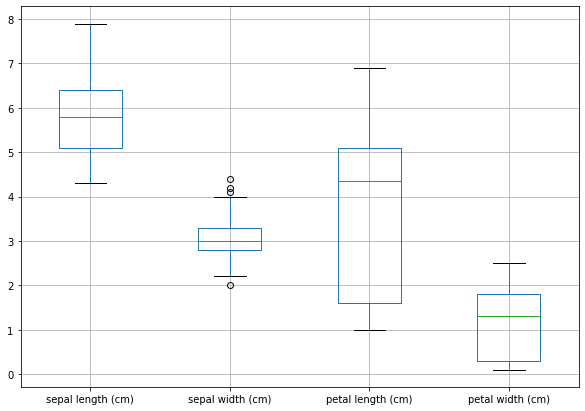

In [17]:
df.boxplot(figsize=(10,7))